#**Boosting**

- Boosting é uma estratégia de aprendizado de máquina supervisionado que combina as previsões de vários modelos base para gerar um modelo de conjunto poderoso. Ao contrário de abordagens de conjunto clássicas, como bagging ou média, o boosting concentra-se em treinar sucessivamente os modelos básicos de uma maneira que destaca amostras classificadas incorretamente nas iterações anteriores.
- O objetivo é priorizar as amostras que foram categorizadas incorretamente em iterações anteriores, permitindo que o modelo aprenda com seus erros e melhore seu desempenho de forma iterativa.

#**Como funciona o processo de boosting**


- **Modelo inicial**: No início do processo, cada exemplo de treinamento recebe um peso igual.

- **Treinar um aprendiz fraco**: Os dados de treinamento ponderados são utilizados para treinar um aprendiz fraco. Um aprendiz fraco é um modelo simples que supera a escolha aleatória apenas marginalmente. Por exemplo, uma árvore de decisão com poucos níveis pode ser utilizada como aprendiz fraco.

- **Cálculo do erro**: O erro do aprendiz fraco nos dados de treinamento é calculado. A soma ponderada dos casos classificados incorretamente constitui o erro.

- **Atualizar pesos**: Os pesos são atualizados de acordo com a taxa de erro dos exemplos de treinamento. Exemplos classificados incorretamente recebem pesos mais altos, enquanto exemplos classificados corretamente recebem pesos mais baixos.

- **Repetir**: Os passos de 2 a 4 são repetidos várias vezes. Um novo aprendiz fraco é treinado nos pesos atualizados dos exemplos de treinamento em cada ciclo.
- **Combinar aprendizes fracos**: O modelo final é composto por todos os aprendizes fracos treinados nas etapas anteriores. A precisão de cada aprendiz fraco é ponderada, e a previsão final é baseada no total ponderado dos aprendizes fracos.

- **Previsão**: O modelo final é usado para prever os rótulos de classe de novas instâncias.

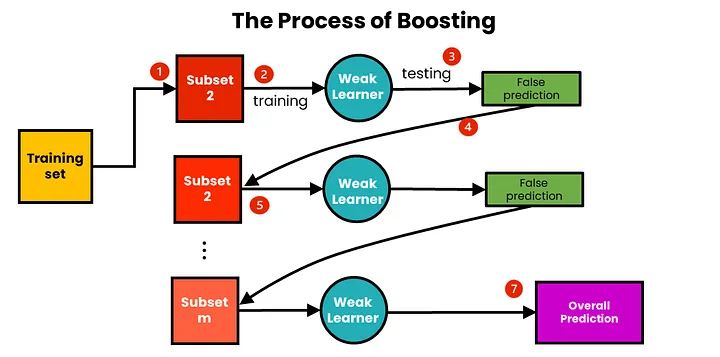

In [1]:
import numpy as np
import xgboost as xgb
import pandas as pd

In [2]:
df = pd.read_csv('/content/SalariosPrevisao.csv')

In [3]:
df

,ID,Profissao,Experiencia,Habilidades,Idade,Genero,Salario
0,1,Professor,7,JavaScript,32,Feminino,13015
1,2,Analista de Dados,11,JavaScript,23,Feminino,8130
2,3,Medico,10,Python,47,Feminino,16699
3,4,Analista de Dados,9,História,57,Masculino,5096
4,5,Analista de Dados,14,JavaScript,54,Masculino,19831
...,...,...,...,...,...,...,...
1995,1996,Engenheiro,19,Matemática,42,Feminino,15102
1996,1997,Analista de Dados,12,Matemática,37,Masculino,15713
1997,1998,Engenheiro,19,Machine Learning,37,Feminino,10775
1998,1999,Analista de Dados,9,Diagnóstico,41,Masculino,8849


In [4]:
df['Habilidades'].value_counts()

Cirurgia            247
Diagnóstico         247
Matemática          227
SQL                 226
Python              222
JavaScript          216
Java                213
História            206
Machine Learning    196
Name: Habilidades, dtype: int64

In [5]:
# Convertendo variáveis categóricas em variáveis dummy para facilitar o processamento
df = pd.get_dummies(df, columns=['Habilidades', 'Genero', 'Profissao'])

In [6]:
df = df.drop("ID", axis='columns')

In [7]:
df

,Experiencia,Idade,Salario,Habilidades_Cirurgia,Habilidades_Diagnóstico,Habilidades_História,Habilidades_Java,Habilidades_JavaScript,Habilidades_Machine Learning,Habilidades_Matemática,Habilidades_Python,Habilidades_SQL,Genero_Feminino,Genero_Masculino,Profissao_Analista de Dados,Profissao_Desenvolvedor,Profissao_Engenheiro,Profissao_Medico,Profissao_Professor
0,7,32,13015,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,11,23,8130,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,10,47,16699,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,9,57,5096,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
4,14,54,19831,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,19,42,15102,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1996,12,37,15713,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1997,19,37,10775,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1998,9,41,8849,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [8]:
df.columns

Index(['Experiencia', 'Idade', 'Salario', 'Habilidades_Cirurgia',
       'Habilidades_Diagnóstico', 'Habilidades_História', 'Habilidades_Java',
       'Habilidades_JavaScript', 'Habilidades_Machine Learning',
       'Habilidades_Matemática', 'Habilidades_Python', 'Habilidades_SQL',
       'Genero_Feminino', 'Genero_Masculino', 'Profissao_Analista de Dados',
       'Profissao_Desenvolvedor', 'Profissao_Engenheiro', 'Profissao_Medico',
       'Profissao_Professor'],
      dtype='object')

In [9]:
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


# Separando as variáveis de entrada (X) e a variável de saída (y) do conjunto de dados
X = df.drop('Salario', axis=1)
y = df['Salario']

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# **Hiperparâmetros**
São configurações que definem aspectos do treinamento e da estrutura do modelo. Não são aprendidos nos dados, mas são configurados antes do treinamento.

- *max_depth*: É a profundidade máxima da árvore. Se for "None", então os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que "min_samples_split" amostras.

- *n_estimators*: O número de árvores no modelo.

- *learning_rate*: A rapidez com que o modelo aprende. Cada árvore adicionada modifica o modelo global. A magnitude da modificação é controlada pela taxa de aprendizado.


In [10]:
# Criando um regressor XGBoost para prever salários, utilizando a métrica RMSLE para avaliação
regressor=xgb.XGBRegressor(eval_metric='rmsle')

# Importando a classe GridSearchCV do scikit-learn para realizar busca em grade de hiperparâmetros
from sklearn.model_selection import GridSearchCV
# Definindo o grid de parâmetros a serem testados durante a busca em grade
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# Realizando a busca em grade para encontrar a combinação ideal de hiperparâmetros
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados pela busca em grade
print("Os melhores hiperparâmetros são ",search.best_params_)

Os melhores hiperparâmetros são  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [11]:
# Criando um modelo XGBoostRegressor com os melhores hiperparâmetros definidos
model = XGBRegressor(n_estimators=500, max_depth=4, learning_rate=0.1, eval_metric='rmsle')

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Realizando previsões no conjunto de treinamento
predictions = model.predict(X_train)

A métrica RMSLE (Root Mean Squared Logarithmic Error) é uma medida de desempenho comum em problemas de regressão, especialmente quando as variáveis de destino (rótulos verdadeiros) abrangem uma ampla gama de valores. O RMSLE é uma versão modificada do erro quadrático médio (RMSE), que adiciona uma etapa de logaritmo para penalizar mais os erros relativos a valores mais altos.

A fórmula para o RMSLE é a seguinte:

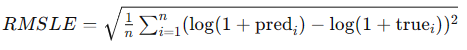


Onde:


- **n** é o número total de amostras
pred

- **pred i** é a previsão do modelo para a amostra

- **true i** é o valor verdadeiro (rótulo) para a amostra

- **log** log refere-se ao logaritmo natural (base e)

O RMSLE penaliza mais os erros relativos a valores mais altos, tornando-o adequado para problemas em que a escala dos rótulos pode variar significativamente. Se o RMSLE é zero, isso indica que as previsões são perfeitas em relação aos valores verdadeiros.

Portanto, ao interpretar o resultado do código fornecido, um RMSLE mais próximo de zero sugere um melhor desempenho do modelo em fazer previsões precisas em relação aos valores reais. Quanto maior o valor do RMSLE, pior é o desempenho do modelo. É importante comparar esse valor com outros modelos ou métricas de avaliação para ter uma compreensão completa do quão bem o modelo está performando.

In [12]:
# Carregando a solução real para comparação com as previsões do modelo
solution = pd.read_csv('/content/SalariosPrevisao.csv')

# Obtendo os valores reais (ground truth) da variável de saída
y_true = solution['Salario']

# Importando a métrica RMSLE do scikit-learn
from sklearn.metrics import mean_squared_log_error

# Realizando previsões utilizando o modelo treinado (assumindo que 'model' já foi treinado)
predictions = model.predict(X)  # X é o seu conjunto de dados de entrada

# Garantindo que as previsões têm o mesmo número de amostras que os valores reais
assert len(predictions) == len(y_true), "O número de amostras em previsões e y_true deve ser o mesmo"

# Calculando a métrica RMSLE para avaliar o desempenho do modelo
RMSLE = np.sqrt(mean_squared_log_error(y_true, predictions))

# Imprimindo o resultado da métrica RMSLE
print("O score é %.6f" % RMSLE)


O score é 0.286816


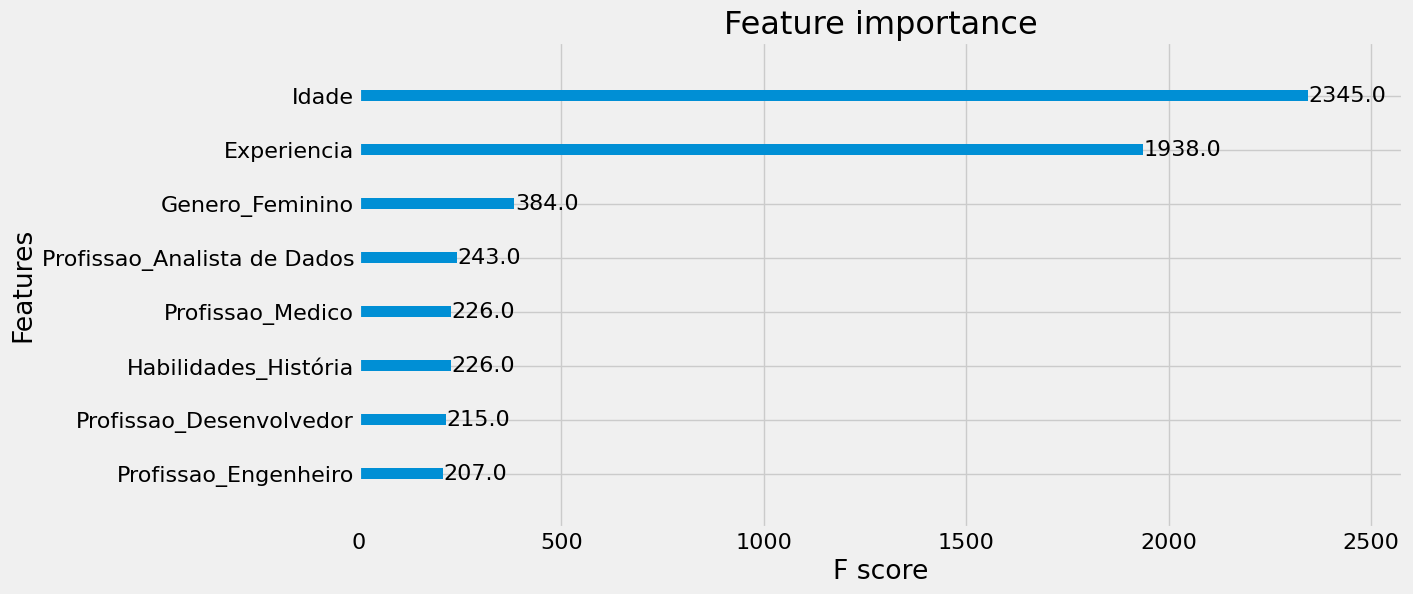

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model, max_num_features=8, ax=ax)
plt.show();

# O porque dele utilizar as features 'Idade' e 'Experiencia' no plot das árvores treinadas:
Ao utilizar a função **plot_tree** do XGBoost, ela mostra as features que são consideradas importantes pela árvore específica que está sendo visualizada. Isso não significa que essas são as únicas features utilizadas em todo o modelo. Cada árvore no modelo pode selecionar diferentes features com base em sua importância para realizar as decisões.

A importância das features em um modelo XGBoost é determinada pelo ganho (gain) que cada feature traz para a redução da função de custo durante o treinamento. Features com maior ganho são consideradas mais importantes e têm maior probabilidade de serem escolhidas para as decisões nas árvores.

Se, ao visualizar várias árvores, você perceber que 'Idade' e 'Experiencia' são frequentemente selecionadas, isso sugere que essas features são consideradas importantes para o modelo no geral. No entanto, isso não implica que outras features não estão sendo utilizadas por outras árvores.

**tem como realizar com outras features caso queiram, teria que especificar as mesmas**

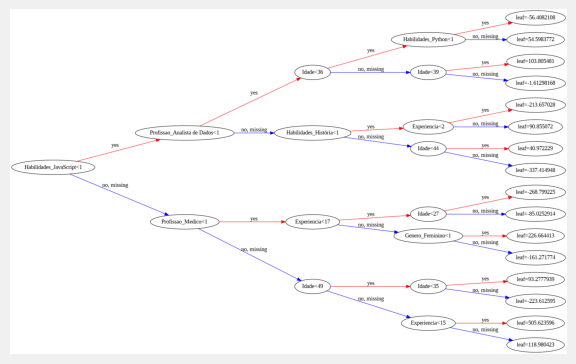

In [14]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Escolhe o índice da árvore que deseja visualizar (por exemplo, a primeira árvore)
tree_index = 0

# Usa plot_tree para visualizar a árvore
plot_tree(model, num_trees=tree_index, rankdir='LR')  # rankdir='LR' para orientação horizontal
plt.show()


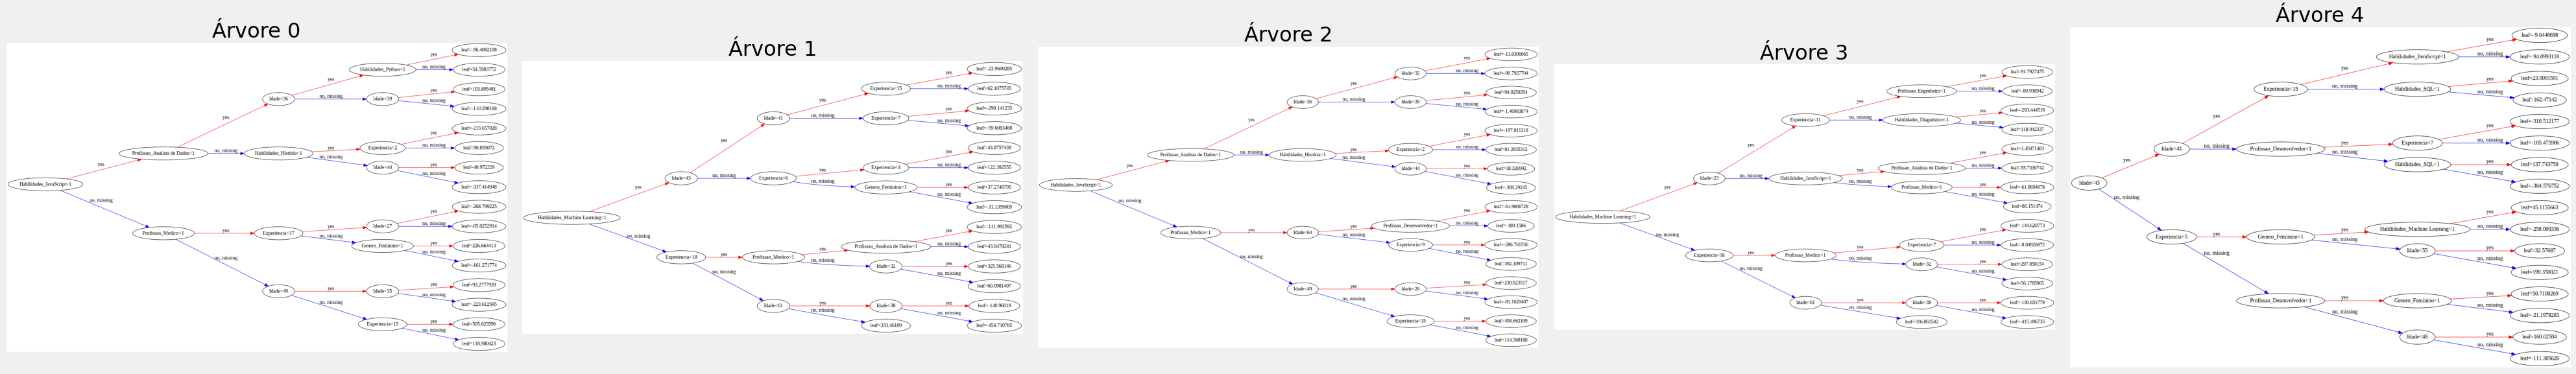

In [15]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_tree

num_trees = 5  # Defina o número de árvores que deseja visualizar

# Crie uma figura com subplots para cada árvore
fig, axs = plt.subplots(1, num_trees, figsize=(40, 20), tight_layout=True)

# Itera sobre as árvores e plote cada uma
for i in range(num_trees):
    plot_tree(model, num_trees=i, ax=axs[i], rankdir='LR')

    axs[i].set_title(f'Árvore {i}')

plt.show()


**DOCUMENTAÇÃO DATASET**
### <center style="background-color:Gainsboro; width:60%;">Links</center>
* XGBoost: [documentation](https://xgboost.readthedocs.io/en/latest/index.html), [GitHub](https://github.com/dmlc/xgboost)
* [Gradient Boosting from scratch](https://blog.mlreview.com/gradient-boosting-from-scratch-1e317ae4587d)
* ["A Guide on XGBoost hyperparameters tuning"](https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning) by [Prashant Banerjee](https://www.kaggle.com/prashant111)

### <center style="background-color:Gainsboro; width:60%;">Videos</center>
* [Gradient Boost Part 1 (of 4): Regression Main Ideas](https://youtu.be/3CC4N4z3GJc)
* [Gradient Boost Part 2 (of 4): Regression Details](https://youtu.be/2xudPOBz-vs)
* [XGBoost Part 1 (of 4): Regression](https://youtu.be/OtD8wVaFm6E)
* [XGBoost Part 2 (of 4): Classification](https://youtu.be/8b1JEDvenQU)

### <center style="background-color:Gainsboro; width:60%;">Referências</center>
[1] [J. Elith, J. R. Leathwick, and T. Hastie "*A working guide to boosted regression trees*", Journal of Animal Ecology **77** pp. 802-813 (2008)](https://doi.org/10.1111/j.1365-2656.2008.01390.x)